#### Jorge Eduardo Rondón Ruiz
#### Ingeniero electrónico
#### Universidad Nacional de Colombia
## Esto es un cambio de prueba para github
***

# Taller pandas

Actividades a desarrollar:

1. Diga qué índices serían pertienentes tener y pongalos.

2. Elimine registros que tengan NA en la columna "pm2.5"

3. Realice un describe de todas las variables por año. Además de realizar un gráfico como boxplot con el que pueda comparar los resultados dados.

4. Realice un gráfico de disperción de las variables "pm2.5" y "TEMP" con título, labels apropiados y color rojo para los datos. Describa: ¿Qué se puede inferir de dicho gráfico?

5. Calcule la probabilidad de encontrar en la Base de datos el valor de pm2.5 encima de 120

6. Para finalizar, agrupe por año el valor de la variable "pm2.5", calcule el promedio y ordene la base de datos de manera ascendente por el promedio.

# Desarrollo

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Creación de la variable que contiene la ruta del archivo de datos
dataPath='/home/jorgerondon/Documentos/InteligenciaArtificial/DiplomadoIA/TallerPandas/PRSA_data_2010.1.1-2014.12.31.csv'
df=pd.read_csv(dataPath).copy()

# Punto 1

In [89]:
# Considero que los indices mas apropiados serían las fechas y horas de cada medición
df.insert(0,"Fecha_Hora",pd.to_datetime(df[["year","month","day","hour"]]))
df.set_index("Fecha_Hora", inplace=True)
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
Fecha_Hora,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0


# Punto 2

In [78]:
#Eliminamos las filas con valor NA en la columna pm2.5
df.dropna(subset=["pm2.5"],inplace=True)
df

# Punto 3

In [80]:
#Se agrupa por año y se realiza el describe()
df.groupby(["year"]).describe()

No                                                                   \
       count          mean          std      min       25%      50%       75%   
year                                                                            
2010  8091.0   4354.141268  2552.460188     25.0   2122.00   4337.0   6679.50   
2011  8032.0  13201.776768  2552.003366   8785.0  10961.75  13192.5  15477.25   
2012  8295.0  21860.769379  2511.078629  17521.0  19678.50  21817.0  24074.50   
2013  8678.0  30677.221249  2526.661534  26305.0  28485.25  30678.5  32866.75   
2014  8661.0  39429.862487  2525.144611  35065.0  37241.00  39428.0  41616.00   

                month            ...   Is            Ir                      \
          max   count      mean  ...  75%   max   count      mean       std   
year                             ...                                          
2010   8760.0  8091.0  6.494747  ...  0.0  27.0  8091.0  0.269312  1.836257   
2011  17520.0  8032.0  6.601096  ...  0.0  20.0  8032.0  0.149278  1.110730   
2012  26304.0  8295.0  6.452200  ...  0.0  19.0  8295.0  0.265943  1.766490   
2013  35064.0  8678.0  6.517516  ...  0.0  11.0  8678.0  0.161904  1.150911   
2014  43824.0  8661.0  6.505715  ...  0.0  23.0  8661.0  0.132548  1.034723   

                                
      min  25%  50%  75%   max  
year                            
2010  0.0  0.0  0.0  0.0  36.0  
2011  0.0  0.0  0.0  0.0  23.0  
2012  0.0  0.0  0.0  0.0  32.0  
2013  0.0  0.0  0.0  0.0  25.0  
2014  0.0  0.0  0.0  0.0  23.0  

[5 rows x 88 columns]

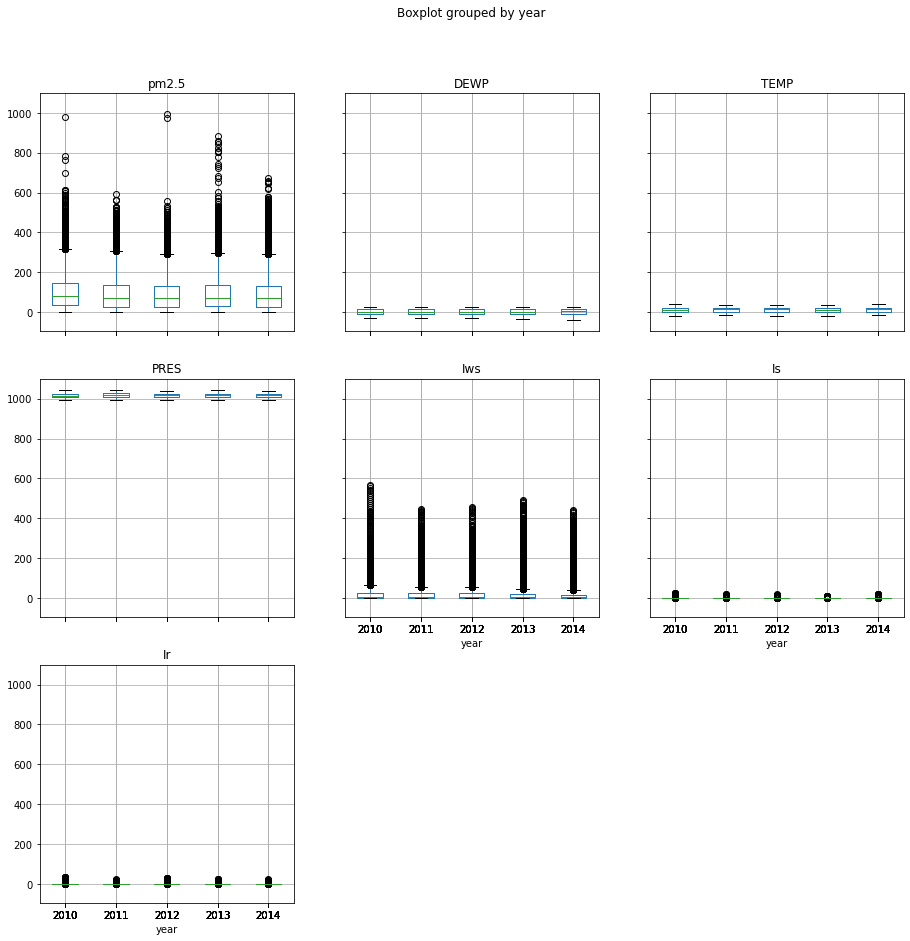

In [81]:
#Boxplot de mis columnas de interes agrupadas por año
boxplot=df.boxplot(figsize=(15,15),by="year", column=["pm2.5","DEWP","TEMP","PRES","Iws","Is","Ir"])

# Punto 4

Realice un gráfico de disperción de las variables "pm2.5" y "TEMP" con título, labels apropiados y color rojo para los datos. Describa: ¿Qué se puede inferir de dicho gráfico?

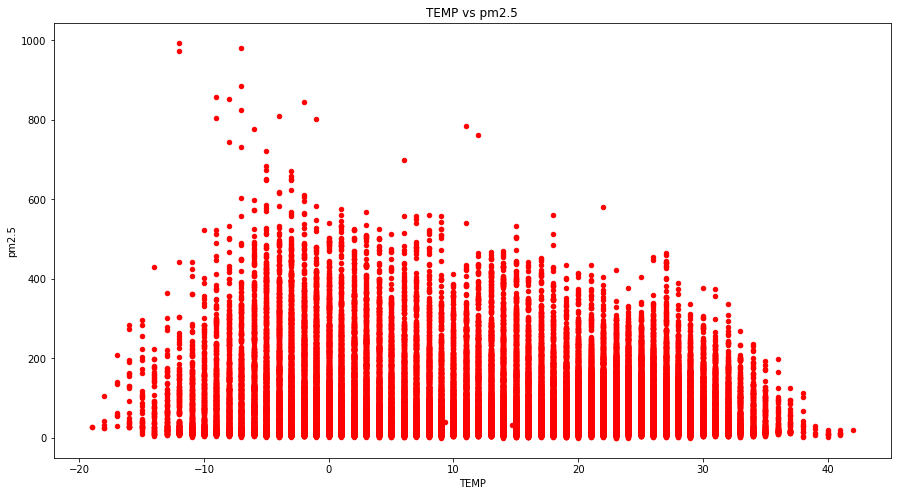

In [82]:
#Gráfico de dispersión entre variables TEMP y pm2.5
df.plot(kind = 'scatter', x = 'TEMP', y='pm2.5',figsize=(15,8), title="TEMP vs pm2.5", c="r")
plt.show() 

# Punto 5

In [83]:
#Calculo de probabilidad
var=(df[df[["pm2.5"]]>120].count())/len(df)*100
var #Aquí se puede observar que la probabilidad es de 29% aproximadamente.

No        0.000000
year      0.000000
month     0.000000
day       0.000000
hour      0.000000
pm2.5    29.894389
DEWP      0.000000
TEMP      0.000000
PRES      0.000000
cbwd      0.000000
Iws       0.000000
Is        0.000000
Ir        0.000000
dtype: float64

# Punto 6

In [87]:
#Organizar ascendentemente dependiendo del promedio de pm2.5 sacado por año
df.groupby("year")["pm2.5"].mean().sort_values()

year
2012     90.545871
2014     97.734557
2011     99.071340
2013    101.712376
2010    104.045730
Name: pm2.5, dtype: float64